In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import re
from nltk.corpus import stopwords
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM,Dense, Dropout, Embedding, Bidirectional
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
# from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

news_data = pd.read_csv("/Users/akhilesh/Desktop/news_dataset.csv")
news_data.content=news_data.content.astype(str)
X = news_data.content
# Name: is_sarcastic, Length: 26709, dtype: int64
Y = news_data.label
Y = Y.values.reshape(-1, 1)
print('Done')

Using TensorFlow backend.


Done


In [2]:
seed = 0
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
train_acc = []
val_acc = []
test_acc = []
prec = []
recall = []
roc = []
for train, test in k_fold.split(X, Y):
    max_words = 40000
    max_length = 150
    t = Tokenizer(num_words=max_words)
    t.fit_on_texts(X[train])
    train_sequence = t.texts_to_sequences(X[train])
    train_padded = pad_sequences(train_sequence, maxlen=max_length)
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_length))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64,  return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    model.summary()
    histroy = model.fit(train_padded, Y[train], batch_size=100, epochs=150, validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.00001)])
#    histroy = model.fit(train_padded, Y[train], batch_size=100, epochs=25, validation_split=0.1)
    train_acc.append(histroy.history['accuracy'][-1])
    val_acc.append(histroy.history['val_accuracy'][-1])
    test_sequence = t.texts_to_sequences(X[test])
    test_padded = pad_sequences(test_sequence, maxlen=max_length)
    test_scores = model.evaluate(test_padded, Y[test])
    predictions = model.predict_classes(test_padded)
    predictions = predictions[:,0]
    prec.append(precision_score(Y[test], predictions))
    recall.append(recall_score(Y[test], predictions))
    roc.append(roc_auc_score(Y[test], predictions))
    test_acc.append(test_scores[1])

print(train_acc)
print(val_acc)
print(test_acc)
print(prec)
print(recall)
print(roc)
print("training accuracy:", np.mean(train_acc))
print("validation accuracy:", np.mean(val_acc))
print("test accuracy:", np.mean(test_acc))
print("Precision:", np.mean(prec))
print("Recall:", np.mean(recall))
print("ROC AUC:", np.mean(roc))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 64)           2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 150, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23255 samples, validate on 2584 samples
Epoch 1/150
23255/23255 [==============================] - 97s 4ms/step - loss: 0.2935 - accuracy: 0.8714 - val_loss: 0.4149 - val_accuracy: 0.8390
Epoch 2/150
2872/2872 [==============================] - 3s 998us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 64)           2560000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 150, 64)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 256)          

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23256 samples, validate on 2584 samples
Epoch 1/150
23256/23256 [==============================] - 108s 5ms/step - loss: 0.2911 - accuracy: 0.8754 - val_loss: 0.3528 - val_accuracy: 0.8835
Epoch 2/150
2871/2871 [==============================] - 3s 1ms/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 64)           2560000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 150, 64)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 256)           

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23256 samples, validate on 2584 samples
Epoch 1/150
23256/23256 [==============================] - 105s 5ms/step - loss: 0.2969 - accuracy: 0.8678 - val_loss: 0.4253 - val_accuracy: 0.8398
Epoch 2/150
23256/23256 [==============================] - 108s 5ms/step - loss: 0.0887 - accuracy: 0.9691 - val_loss: 0.4204 - val_accuracy: 0.8506
Epoch 3/150
2871/2871 [==============================] - 4s 1ms/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 150, 64)           2560000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 150, 64)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_8 (Bidirection (None

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23256 samples, validate on 2584 samples
Epoch 1/150
23256/23256 [==============================] - 107s 5ms/step - loss: 0.2942 - accuracy: 0.8709 - val_loss: 0.4384 - val_accuracy: 0.8533
Epoch 2/150
23256/23256 [==============================] - 105s 5ms/step - loss: 0.0916 - accuracy: 0.9680 - val_loss: 0.2945 - val_accuracy: 0.8893
Epoch 3/150
2871/2871 [==============================] - 4s 1ms/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 150, 64)           2560000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 150, 64)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_10 (Bidirectio (None

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23256 samples, validate on 2584 samples
Epoch 1/150
23256/23256 [==============================] - 117s 5ms/step - loss: 0.3048 - accuracy: 0.8635 - val_loss: 0.4968 - val_accuracy: 0.7763
Epoch 2/150
23256/23256 [==============================] - 112s 5ms/step - loss: 0.0841 - accuracy: 0.9707 - val_loss: 0.4165 - val_accuracy: 0.8719
Epoch 3/150
2871/2871 [==============================] - 3s 1ms/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 150, 64)           2560000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 150, 64)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_12 (Bidirectio (None

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23256 samples, validate on 2584 samples
Epoch 1/150
23256/23256 [==============================] - 116s 5ms/step - loss: 0.3003 - accuracy: 0.8669 - val_loss: 0.5276 - val_accuracy: 0.8084
Epoch 2/150
23256/23256 [==============================] - 122s 5ms/step - loss: 0.0881 - accuracy: 0.9691 - val_loss: 0.3874 - val_accuracy: 0.8394
Epoch 3/150
2871/2871 [==============================] - 4s 1ms/step
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 150, 64)           2560000   
_________________________________________________________________
dropout_13 (Dropout)         (None, 150, 64)           0         
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_14 (Bidirectio (None

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23256 samples, validate on 2584 samples
Epoch 1/150
23256/23256 [==============================] - 123s 5ms/step - loss: 0.3019 - accuracy: 0.8663 - val_loss: 0.5270 - val_accuracy: 0.8115
Epoch 2/150
23256/23256 [==============================] - 123s 5ms/step - loss: 0.0870 - accuracy: 0.9695 - val_loss: 0.2380 - val_accuracy: 0.8951
Epoch 3/150
2871/2871 [==============================] - 4s 1ms/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 150, 64)           2560000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 150, 64)           0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_16 (Bidirectio (None

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23256 samples, validate on 2584 samples
Epoch 1/150
23256/23256 [==============================] - 124s 5ms/step - loss: 0.2916 - accuracy: 0.8705 - val_loss: 0.3436 - val_accuracy: 0.8456
Epoch 2/150
2871/2871 [==============================] - 4s 1ms/step
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 150, 64)           2560000   
_________________________________________________________________
dropout_17 (Dropout)         (None, 150, 64)           0         
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_17 (Dense)             (None, 256)           

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23256 samples, validate on 2584 samples
Epoch 1/150
23256/23256 [==============================] - 120s 5ms/step - loss: 0.2921 - accuracy: 0.8705 - val_loss: 0.3200 - val_accuracy: 0.8669
Epoch 2/150
2871/2871 [==============================] - 3s 1ms/step
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 150, 64)           2560000   
_________________________________________________________________
dropout_19 (Dropout)         (None, 150, 64)           0         
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_19 (Dense)             (None, 256)          

/Users/akhilesh/anaconda3/envs/Black_Hole/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23256 samples, validate on 2584 samples
Epoch 1/150
23256/23256 [==============================] - 115s 5ms/step - loss: 0.2925 - accuracy: 0.8726 - val_loss: 0.4145 - val_accuracy: 0.8560
Epoch 2/150
23256/23256 [==============================] - 116s 5ms/step - loss: 0.0964 - accuracy: 0.9667 - val_loss: 0.2848 - val_accuracy: 0.8878
Epoch 3/150
2871/2871 [==============================] - 3s 1ms/step
[0.97080195, 0.97033024, 0.99071205, 0.99221706, 0.99367905, 0.9917871, 0.9912711, 0.96723425, 0.9664603, 0.9853801]
[0.8107585310935974, 0.8633900880813599, 0.7914086580276489, 0.8010835647583008, 0.8297213912010193, 0.8301083445549011, 0.8270123600959778, 0.806501567363739, 0.8641641139984131, 0.8506191968917847]
[0.902506947517395, 0.9118773937225342, 0.8916753530502319, 0.9136189222335815, 0.9122257232666016, 0.9049111604690552, 0.9101358652114868, 0.909439206123352, 0.9031696319580078, 0.9132706522941589]
[0.8733812949640288, 0.8958818958818959, 0.8412138320395202, 0.88070

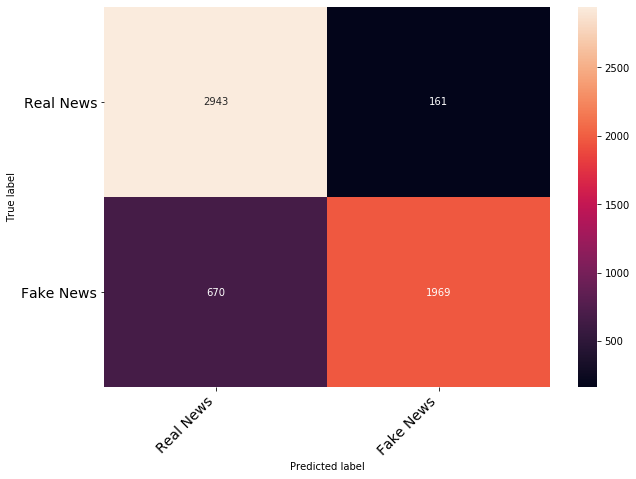

In [19]:
# figsize = (10,7)
# fontsize=14
# df_cm = pd.DataFrame(cm, index=labels, columns=labels)
# fig = plt.figure(figsize=figsize)
# heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
# bottom, top = heatmap.get_ylim()
# heatmap.set_ylim(bottom + 0.5, top - 0.5)
# plt.ylabel('True label')
# plt.xlabel('Predicted label')





# sns.set(font_scale=1.4)
# sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, annot_kws={"size": 16})
# plt.xlabel('Real values')
# plt.ylabel('prediction')
# # plt.ticklabel_format(useOffset=False)
# plt.show()